In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("mnist_train.csv")

In [4]:
def randomize_sample(df):
    df = df.sample(frac = 1)
    ONE_HOT_Y = pd.get_dummies(df.label)
    x_train = df.drop(['label'], axis=1)
    y_train = df.loc[:,'label']
    x_train = np.array(x_train)/255
    y_train = np.array(y_train).reshape(len(df),1)
    ONE_HOT_Y = np.array(ONE_HOT_Y)
    return x_train, y_train, ONE_HOT_Y

In [5]:
def save_model(W1_new, b1_new, W2_new, b2_new, path):
    W1_save = pd.DataFrame(W1_new)
    W1_save.to_csv(f"{path}/W1.csv", index=False)
    b1_save = pd.DataFrame(b1_new)
    b1_save.to_csv(f"{path}/b1.csv", index=False)
    W2_save = pd.DataFrame(W2_new)
    W2_save.to_csv(f"{path}/W2.csv", index=False)
    b2_save = pd.DataFrame(b2_new)
    b2_save.to_csv(f"{path}/b2.csv", index=False)

In [6]:
def load_model(path):
    W1_new, b1_new, W2_new, b2_new = np.array(pd.read_csv(f"{path}/W1.csv")), np.array(pd.read_csv(f"{path}/b1.csv")), np.array(pd.read_csv(f"{path}/W2.csv")), np.array(pd.read_csv(f"{path}/b2.csv"))
    return W1_new, b1_new, W2_new, b2_new

In [7]:
# x_train, y_train, one_hot_Y = randomize_sample(df)

In [8]:
# one_hot_Y.shape, x_train.shape

In [9]:
# one_hot_Y.T[6], y_train[6]

In [10]:
# x_train_visualize = x_train.reshape(len(df),28,28)

In [11]:
# plt.imshow(x_train_visualize[-1], cmap='gray')
# plt.show()
# print(y_train[-1])

In [12]:
def relu(X):
    return np.maximum(0, X)
def relu_derivative(X):
#     X[X<0] = 0
#     X[X>=0] = 1
    return (X >= 0) * 1

def sigmoid(X):
#     X = np.float64(X)
    return 1/(1+np.exp(X))

def softmax(X):
#     X = np.float64(X)
    e = np.exp(X)
    return e/e.sum()

In [13]:
def init_parameters():
    W1 = np.random.randn(10,784)
    b1 = np.random.randn(10,1)
    W2 = np.random.randn(10,10)
    b2 = np.random.randn(10,1)
    return W1, b1, W2, b2

In [14]:
# W1, b1, W2, b2 = init_parameters()

In [15]:
def forward_propagation(W1, b1, W2, b2, X):
    a1 = b1 + W1.dot(X).reshape(10,1)
    h1 = relu(a1)
    a2 = b2 + W2.dot(h1)
    y_cap = softmax(a2).T
    return h1, a1, a2, y_cap

In [16]:
# for X in x_train:
#     a1 = b1 + W1.dot(X).reshape(10,1)
#     h1 = sigmoid(a1)
#     a2 = b2 + W2.dot(h1)
#     y_cap = softmax(a2).T
#     print(y_cap.T.shape)

In [17]:
# for hot in one_hot_Y:
#     print(hot.reshape(10,1))

In [18]:
def back_propagation(h1, a1, a2, W1, W2, y_cap, X, one_hot_Y):
    grad_L_theta_a2 = -(one_hot_Y.reshape(10,1) - y_cap.T)
    grad_L_theta_W2 = grad_L_theta_a2.dot(h1.T)
    grad_L_theta_b2 = grad_L_theta_a2
    grad_L_theta_h1 = W2.T.dot(grad_L_theta_a2)
#     grad_L_theta_a1 = grad_L_theta_h1*(sigmoid(a1)*(1 - sigmoid(a1)))
    grad_L_theta_a1 = grad_L_theta_h1*relu_derivative(a1)
    grad_L_theta_W1 = grad_L_theta_a1.dot(X.reshape(1,784))
    grad_L_theta_b1 = grad_L_theta_a1
    return grad_L_theta_W1, grad_L_theta_b1, grad_L_theta_W2, grad_L_theta_b2

In [19]:
# x=np.zeros(4)
# x+=[1,2,3,4]
# x+=x
# x

In [20]:
# y_cap.shape

In [21]:
def gradient_decent(epochs, eta, beta1, beta2, eps):
#     W1, b1, W2, b2 = init_parameters()
    path = "model"
    W1, b1, W2, b2 = load_model(path)
    i = 0    
    while i < epochs:
        print(f"Epoch: {i+1} ",end=" ")
        x_train, y_train, ONE_HOT_Y = randomize_sample(df)
        V_W1, V_b1, V_W2, V_b2 = np.zeros((W1.shape)), np.zeros((b1.shape)), np.zeros((W2.shape)), np.zeros((b2.shape))
        mW1, mb1, mW2, mb2 = np.zeros((W1.shape)), np.zeros((b1.shape)), np.zeros((W2.shape)), np.zeros((b2.shape))
        good_count = 0
        for X, Y_HOT in zip(x_train, ONE_HOT_Y):  
            
            h1, a1, a2, y_cap = forward_propagation(W1, b1, W2, b2, X)
            
            del_W1, del_b1, del_W2, del_b2 = back_propagation(h1, a1, a2, W1, W2, y_cap, X, Y_HOT)
            
            mW1 = beta1*mW1+(1-beta1)*del_W1
            V_W1 = beta2*V_W1 + (1-beta2)*np.square(del_W1)
            
            mb1 = beta1*mb1+(1-beta1)*del_b1
            V_b1 = beta2*V_b1 + (1-beta2)*np.square(del_b1)
            
            mW2 = beta1*mW2+(1-beta1)*del_W2
            V_W2 = beta2*V_W2 + (1-beta2)*np.square(del_W2)
            
            mb2 = beta1*mb2+(1-beta1)*del_b2
            V_b2 = beta2*V_b2 + (1-beta2)*np.square(del_b2)
             
            mW1 = mW1/(1 - beta1**i+1)
            mb1 = mb1/(1 - beta1**i+1)
            mW2 = mW2/(1 - beta1**i+1)
            mb2 = mb2/(1 - beta1**i+1)
            
            V_W1 = V_W1/(1 - beta2**i+1)
            V_b1 = V_b1/(1 - beta2**i+1)
            V_W2 = V_W2/(1 - beta2**i+1)
            V_b2 = V_b2/(1 - beta2**i+1)
            
            W1 = W1 - eta*mW1/np.sqrt(V_W1 + eps)
            b1 = b1 - eta*mb1/np.sqrt(V_b1 + eps)
            W2 = W2 - eta*mW2/np.sqrt(V_W2 + eps)
            b2 = b2 - eta*mb2/np.sqrt(V_b2 + eps)
    
            if np.argmax(y_cap) == np.argmax(Y_HOT):
                good_count += 1
            accuracy = 100*good_count/y_train.size

        print(f"  Accuracy = {accuracy}\n")
        i += 1
    return W1, b1, W2, b2

In [ ]:
epochs, eta, beta1, beta2, eps = 10, 0.0001, 0.9, 0.999, 1e-8

In [ ]:
W1_new, b1_new, W2_new, b2_new = gradient_decent(epochs, eta, beta1, beta2, eps)
path = 'model'
save_model(W1_new, b1_new, W2_new, b2_new, path)
print("\nModel Saved")

In [26]:
path = "model"
W1, b1, W2, b2 = load_model(path)
test_df = pd.read_csv("mnist_test.csv")
x_test = test_df.drop(['label'], axis=1)
y_test = test_df.loc[:,'label']
x_test = np.array(x_test)/255
y_test = np.array(y_test).reshape(len(test_df),1)
count = 0
j = 0
for x,y in zip(x_test,y_test):
    a1 = b1 + W1.dot(x).reshape(10,1)
    h1 = relu(a1)
    a2 = b2 + W2.dot(h1)
    y_cap = softmax(a2)
    if np.argmax(y_cap) == int(y):
#         print(np.argmax(y_cap), int(y))
#         print(count)
        j+=1
    count += 1
print("Test Accuracy =",100*j/y_test.size)

Test Accuracy = 89.51


Predicted value = 1,  Actual Value = 1


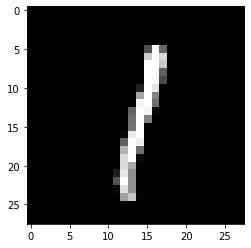

In [28]:
i = 57
a1 = b1 + W1.dot(x_test[i]).reshape(10,1)
h1 = relu(a1)
a2 = b2 + W2.dot(h1)
y_cap = softmax(a2)
print(f"Predicted value = {np.argmax(y_cap)},  Actual Value = {int(y_test[i])}")
x_test_visualize = x_test.reshape(len(test_df),28,28)
plt.imshow(x_test_visualize[i], cmap='gray')
plt.show()